# Preparation
Import the modules:

In [1]:
import time
import numpy as np
import pandas as pd
from math import log, exp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

Initialize parameters:

In [2]:
steps = [1, 2, 3, 5, 8, 13, 21, 34, 55]

Read the dataset:

In [3]:
def read_csv(path):
    dataset = pd.read_csv(path)
    dataset['class'] = dataset['class'].map({'P': 1, 'N': -1})
    x = np.array(dataset[['x', 'y']].values.tolist())
    y = np.array(dataset['class'].values.tolist())
    return x, y

Implementation of [Adaptive Boosting(AdaBoost)](https://en.wikipedia.org/wiki/AdaBoost) for classification task with exponential loss function. The [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) is used as the basic algorithm.

In [4]:
# https://neerc.ifmo.ru/wiki/index.php?title=%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3,_AdaBoost
def adaptive_boost(x, y, max_steps):
    algorithms = []
    size = len(x)
    weights = np.array([1 / size for i in range(size)])
    for step in range(1, max_steps + 1):
        estimator = DecisionTreeClassifier(max_depth=3).fit(x, y, weights)
        predicted = estimator.predict(x)
        num_err = sum([weights[q] * (y[q] != predicted[q]) for q in range(size)])
        alpha = 0.5 * log((1 - num_err) / num_err)
        weights = np.array([weights[q] * exp(-alpha * y[q] * predicted[q]) for q in range(size)])
        weights = weights / np.sum(weights)  # normalization
        algorithms.append([alpha, estimator, 0])
        if step in steps:
            check = predict(algorithms, x)
            algorithms[step - 1][2] = sum([y[q] == check[q] for q in range(size)]) / size
            plot_for_step(algorithms, x, y, step)
    return np.array(algorithms)

# linear classifier
def predict(algorithms, x):
    return np.sign(sum([algorithms[i][0] * algorithms[i][1].predict(x) for i in range(len(algorithms))]))

Functions to plot how the algorithm classifies the entire space after 1, 2, 3, 5, 8, 13, 21, 34, and 55 bootstraps.

In [5]:
def plot_for_step(algorithms, x, y, step):
    def get_color(cur_y):
        return 'green' if cur_y >= 0 else 'red'

    for i in range(len(x)):
        plt.scatter(x[i, 0], x[i, 1], marker=('+' if y[i] == 1 else '_'), c=get_color(y[i]), s=100)

    qty = 100
    xy = plt.gca()
    m_xy = xy.get_xlim(), xy.get_ylim()
    bg_X = np.array([[m_xy[0][0] + i * ((m_xy[0][1] - m_xy[0][0]) / qty),
                      m_xy[1][0] + j * ((m_xy[1][1] - m_xy[1][0]) / qty)]
                     for j in range(qty) for i in range(qty)])

    bg_Y = predict(algorithms, bg_X)
    plt.scatter(bg_X[:, 0], bg_X[:, 1], marker='.', c=[get_color(cur_y) for cur_y in bg_Y], alpha=0.3)
    plt.title("Step " + str(step))
    plt.show()

Function to plot the quality dependence on the step number.

In [6]:
def plot_analysis(algorithms):
    y = algorithms[:, 2]
    y_short = []
    for i in range(len(y)):
        if i + 1 in steps:
            y_short.append(algorithms[i][2])

    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.plot(steps, y_short, 'r')
    plt.show()

# Analysis

Chips


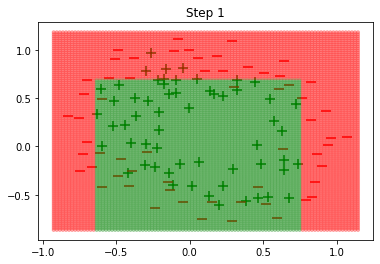

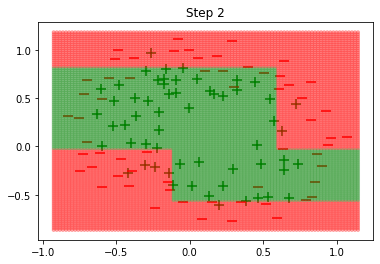

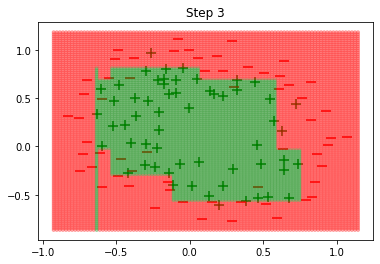

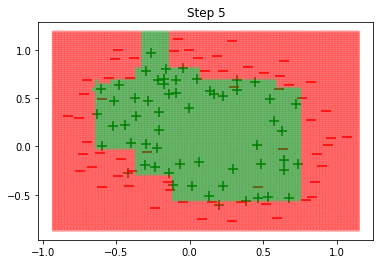

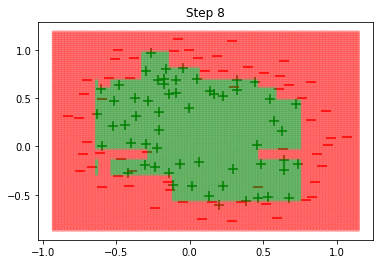

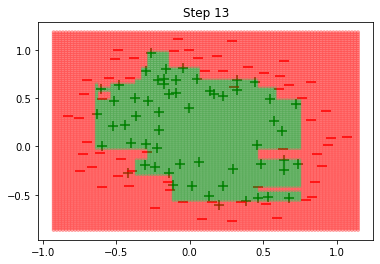

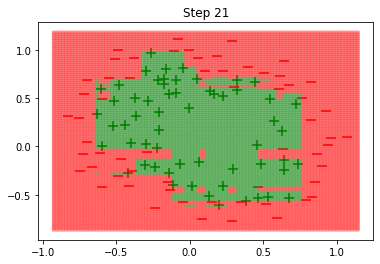

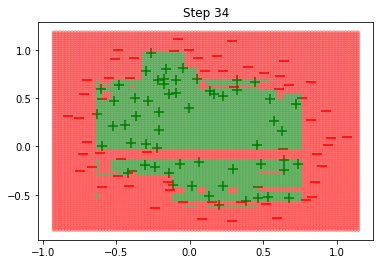

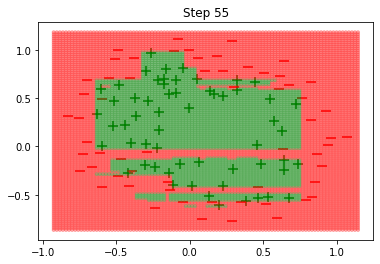

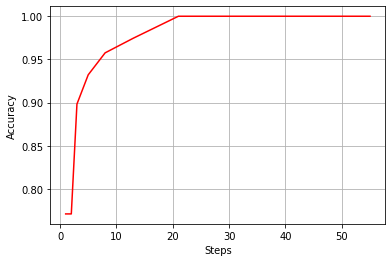

In [7]:
start_time = time.time()

# microchip scrap detection
print("Chips")
chips_x, chips_y = read_csv('./datasets/chips.csv')
plot_analysis(adaptive_boost(chips_x, chips_y, 60))

Geyser


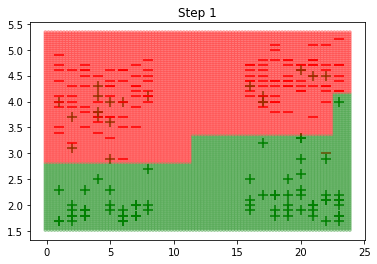

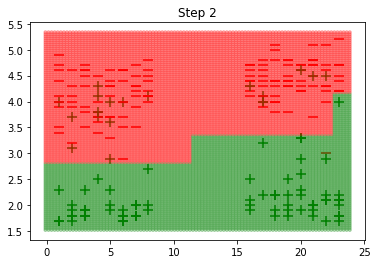

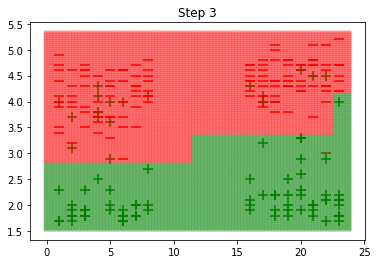

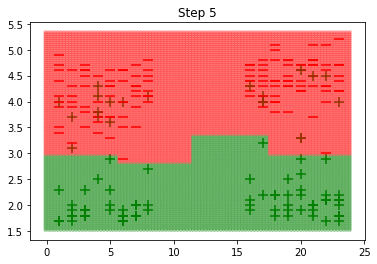

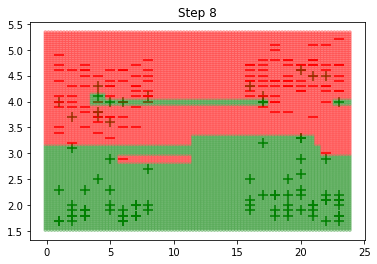

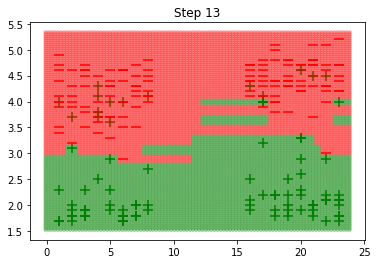

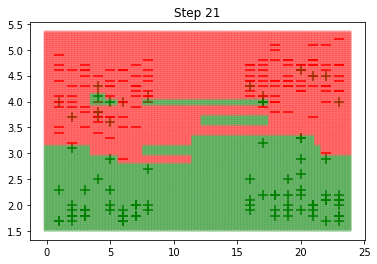

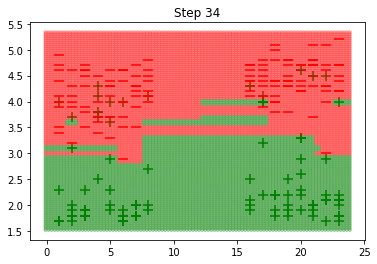

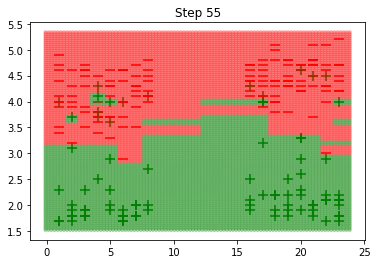

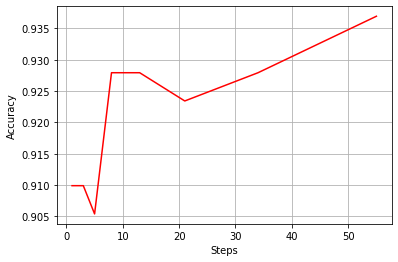

Total working time: 12.700516939163208 seconds.


In [8]:
# data on the eruption of the yellowstone volcano
print("Geyser")
geyser_x, geyser_y = read_csv('./datasets/geyser.csv')
plot_analysis(adaptive_boost(geyser_x, geyser_y, 60))

print("Total working time: %s seconds." % (time.time() - start_time))